<a href="https://colab.research.google.com/github/bisht-deepak/EDA/blob/main/EDA_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mounting Drive and Importing Required **Libraries**

In [87]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 60.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [6]:
#mounting drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set(style="darkgrid")

###Loading and Cleaning the Dataset

In [7]:
#loading the dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter Projects/EDA- Telecom Churn Analysis/Telecom Churn.csv")

In [8]:
#cleaning the data
df.replace({col_name :{"Yes": True, "No":False} for col_name in ["International plan", "Voice mail plan"]}, inplace= True)
# df["Area code"]= df["Area code"].astype("category")                           #converting Area code into a category variable
                                                                                #see: https://pandas.pydata.org/docs/user_guide/categorical.html#:~:text=s.cat.set_categories(%5B2%2C%203%2C%201%5D%2C%20ordered%3DTrue)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



###Assumptions
Account Length refers to the timeperiod(in months) for which a customer has been with the company.

Churn refers to the whether or not the customer opted out of the companies services within the last one year.

###Exploring dataset


In [5]:
print(df.shape)
df.info()

(3333, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   bool   
 4   Voice mail plan         3333 non-null   bool   
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 

###Descriptive Statistics

In [6]:
#Descriptive Statistics for the numerical variables
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#descriptive statistics for boolean variables
df.describe(include= ["bool"])

,International plan,Voice mail plan,Churn
count,3333,3333,3333
unique,2,2,2
top,False,False,False
freq,3010,2411,2850


In [8]:
df.columns[1:]

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

###Exploratory Data Analysis

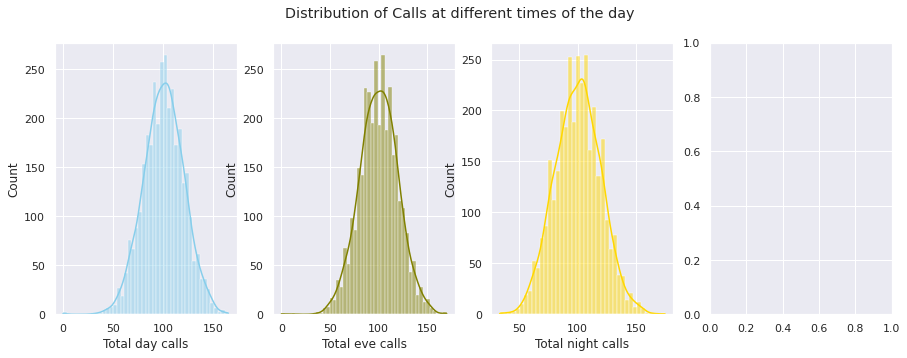

In [9]:
sns.set(style="darkgrid")

fig, axs= plt.subplots(1, 4, figsize= (15, 5))

sns.histplot(data=df, x="Total day calls", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Total eve calls", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="Total night calls", kde=True, color="gold", ax=axs[2])

fig.suptitle("Distribution of Calls at different times of the day")
plt.show()

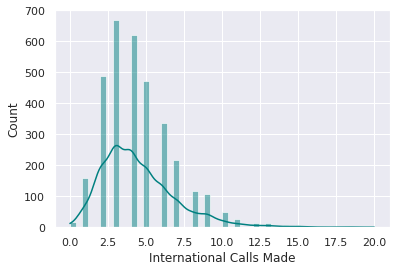

In [10]:
ax= sns.histplot(data=df, x="Total intl calls", kde=True, color="teal")
ax.set(xlabel= "International Calls Made")
plt.show()

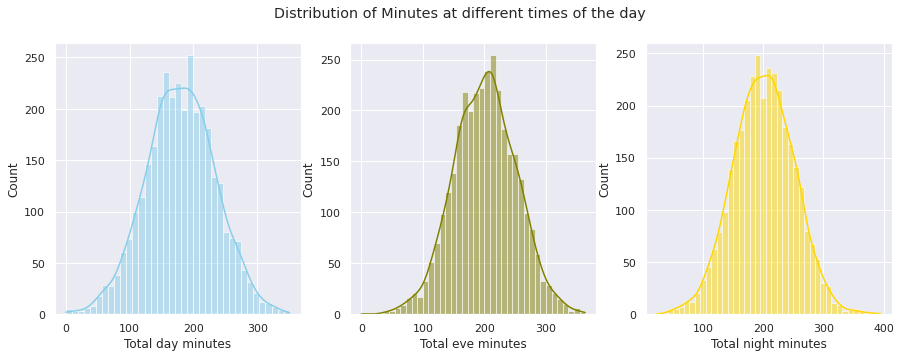

In [11]:
sns.set(style="darkgrid")

fig, axs= plt.subplots(1, 3, figsize= (15, 5))

sns.histplot(data=df, x="Total day minutes", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Total eve minutes", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="Total night minutes", kde=True, color="gold", ax=axs[2])

fig.suptitle("Distribution of Minutes at different times of the day")
plt.show()

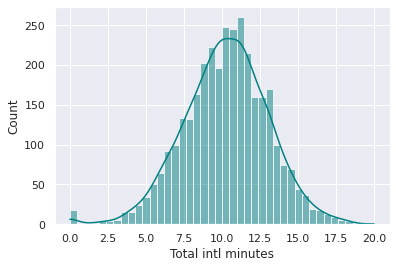

In [12]:
sns.histplot(data=df, x="Total intl minutes", kde=True, color="teal")

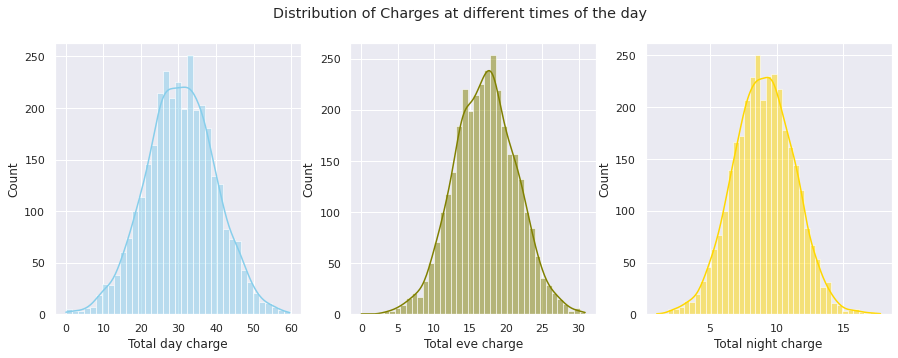

In [13]:


fig, axs= plt.subplots(1, 3, figsize= (15, 5))

sns.histplot(data=df, x="Total day charge", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Total eve charge", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="Total night charge", kde=True, color="gold", ax=axs[2])

fig.suptitle("Distribution of Charges at different times of the day")
plt.show()

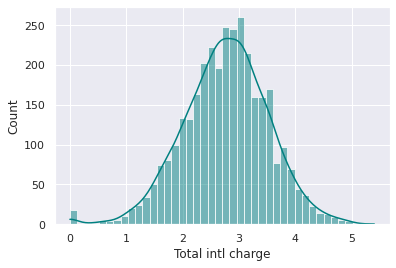

In [14]:
sns.histplot(data=df, x="Total intl charge", kde=True, color="teal")

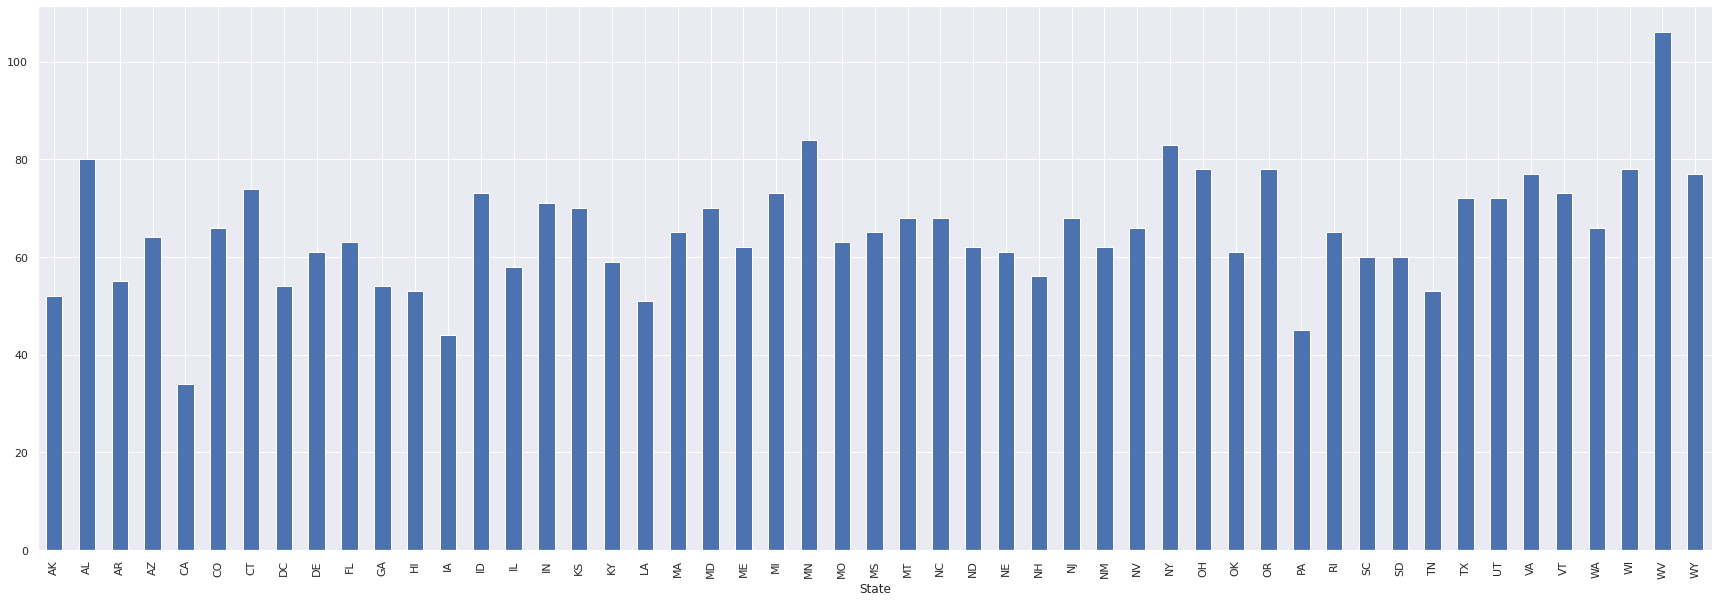

In [48]:
plt.figure(figsize= (30,10))
state_grouped= df.groupby("State").size()
state_grouped.plot.bar()
plt.show()

In [26]:
en(df.loc[df["Churn"]== True])

483

In [29]:
#finding the churn rate for the telecom company
churn_rate= (len(df.loc[df["Churn"]== True])/len(df))*100
print(f"The churn rate for company is {round(churn_rate, 2)}%.")

The churn rate for company is 14.49%.


####According to one report*, the average churn rate in the telecom industry is ~1.9%. But in our case, that number is well over 14%, posing significant risks of loss of revenue over a period of time.

**https://www.heavy.ai/blog/strategies-for-reducing-churn-rate-in-the-telecom-industry#:~:text=Customer%20churn%20in%20the%20telecom,%25%20annually%20for%20prepaid%20services*


In [31]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [38]:
#finding the customer retention ratio for the last year
customer_end= len(df.loc[df["Churn"]== False])
customer_new= len(df.loc[df["Account length"]<= 12])
customer_beginning= len(df.loc[df["Account length"]> 12])
retention_rate= ((customer_end-customer_new)/customer_beginning)*100

print(f"The retention rate for company is {round(retention_rate, 2)}%.")

The retention rate for company is 85.36%.


###According to another report*, the average retention rate for telecom companies is around 78%. At 85%, our company has an above average retention rate, signifying strong customer loyalty towards our brand.

**https://explodingtopics.com/blog/customer-retention-rates#telecommunications-customer-retention*

In [12]:
!python ‐‐version

python3: can't open file '‐‐version': [Errno 2] No such file or directory


In [52]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

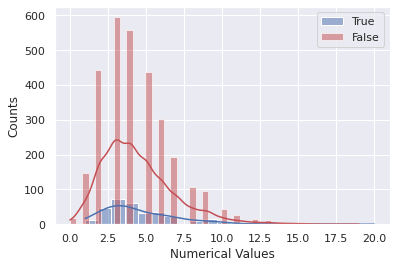

In [57]:
# plotting histograms for 
sns.histplot(df[df['International plan'] == True]['Total intl calls'], kde= True, alpha=0.5, label='True')
sns.histplot(df[df['International plan'] == False]['Total intl calls'], kde= True, alpha=0.5, label='False', color= "r")
plt.legend()
plt.xlabel('Numerical Values')
plt.ylabel('Counts')
plt.show()

In [62]:
avg_true= df[df["International plan"]== True]["Total intl calls"].mean()

In [63]:
avg_false= df[df["International plan"]== False]["Total intl calls"].mean()

In [65]:
100*(avg_true-avg_false)/avg_true

3.1336556675866634

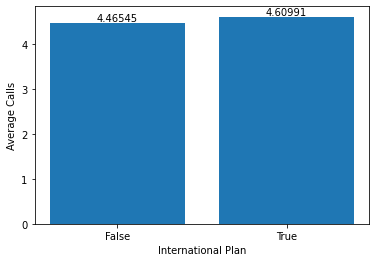

In [10]:
grouped= df.groupby("International plan")["Total intl calls"].mean()
grouped= grouped.to_frame().reset_index()
grouped.rename(columns= {"Total intl calls": "Average Calls"}, inplace= True)
fig= plt.bar(grouped["International plan"], grouped["Average Calls"])
plt.xticks(grouped["International plan"], grouped["International plan"])

plt.xlabel('International Plan')
plt.ylabel('Average Calls')

plt.bar_label(fig)
plt.show()

In [9]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

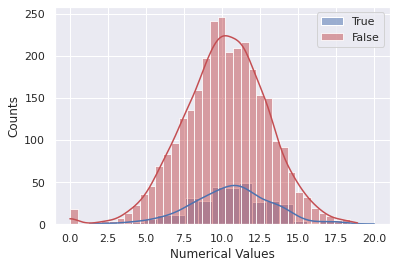

In [12]:
# plotting histograms for 
sns.histplot(df[df['International plan'] == True]['Total intl minutes'], kde= True, alpha=0.5, label='True')
sns.histplot(df[df['International plan'] == False]['Total intl minutes'], kde= True, alpha=0.5, label='False', color= "r")
plt.legend()
plt.xlabel('Numerical Values')
plt.ylabel('Counts')
plt.show()

AttributeError: ignored

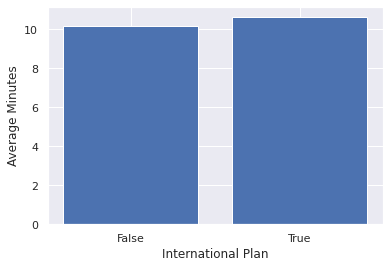

In [13]:
grouped= df.groupby("International plan")["Total intl minutes"].mean()
grouped= grouped.to_frame().reset_index()
grouped.rename(columns= {"Total intl minutes": "Average Minutes"}, inplace= True)
fig= plt.bar(grouped["International plan"], grouped["Average Minutes"])
plt.xticks(grouped["International plan"], grouped["International plan"])

plt.xlabel('International Plan')
plt.ylabel('Average Minutes')

plt.bar_label(fig)
plt.show()